# Collective flow evolution patterns reveal the mesoscopic structure in sequential spatial network snapshots

In [1]:
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import os
from datetime import datetime,date
from tqdm import tqdm
import numpy as np

import CFEP
import Case_study_analysis

import warnings 
warnings.filterwarnings("ignore")

In [3]:
weekday_G=nx.read_gexf(os.getcwd()+'/data/weekday.gexf')
weekend_G=nx.read_gexf(os.getcwd()+'/data/weekend.gexf')
G_distance=nx.read_gexf(os.getcwd()+'/data/G_weighted_by_distance.gexf')
fishnet=gpd.read_file(os.getcwd()+'/data/fishnet_3km_4326.geojson')

## The original weekend and weekday networks

In [3]:
pd.DataFrame.from_dict({'The number of nodes':[len(weekend_G.nodes()),len(weekday_G.nodes())],
                        'The number of edges':[len(weekend_G.edges()),len(weekday_G.edges())]}, orient='index',columns=['Weekend', 'Weekday'])

,Weekend,Weekday
The number of nodes,916,918
The number of edges,58039,81383


## Construct weekend and weekday network snapshots

In [4]:
# weekday_snapshots,weekend_snapshots=CFEP.std_topology(weekday_G,weekend_G)

weekday_snapshots=nx.read_gexf(os.getcwd()+'/data/std_topology_weekday_july21.gexf')
weekend_snapshots=nx.read_gexf(os.getcwd()+'/data/std_topology_weekend_july21.gexf')

flow_filter=2

weekday_snapshots_edge_more_2=weekday_snapshots.copy()
weekend_snapshots_edge_more_2=weekend_snapshots.copy()

for edge in weekday_snapshots.edges(data=True):
    if weekday_snapshots[edge[0]][edge[1]]['weight']<flow_filter and weekend_snapshots[edge[0]][edge[1]]['weight']<flow_filter:
        weekday_snapshots_edge_more_2.remove_edge(edge[0],edge[1])
        weekend_snapshots_edge_more_2.remove_edge(edge[0],edge[1])
        
G_weight_sum=CFEP.sum_weight([weekday_snapshots_edge_more_2,weekend_snapshots_edge_more_2])
print('The average change rate r_g:',round(G_weight_sum[0]/G_weight_sum[1],3))

pd.DataFrame.from_dict({'The number of nodes':[len(weekend_snapshots_edge_more_2.nodes()),len(weekday_snapshots_edge_more_2.nodes())],
                        'The number of edges':[len(weekend_snapshots_edge_more_2.edges()),len(weekday_snapshots_edge_more_2.edges())],
                        }, orient='index',columns=['Weekend', 'Weekday'])


The average change rate r_g: 1.134


,Weekend,Weekday
The number of nodes,920,920
The number of edges,26628,26628


## Evolutionary network initialization and standardization 

In [5]:
P_weekday_g,P_weekend_g=CFEP.get_positive_graph(weekday_snapshots_edge_more_2,weekend_snapshots_edge_more_2)
N_weekday_g,N_weekend_g=CFEP.get_negative_graph(weekday_snapshots_edge_more_2,weekend_snapshots_edge_more_2)

P_g_sum=CFEP.sum_weight([P_weekday_g,P_weekend_g])
N_g_sum=CFEP.sum_weight([N_weekday_g,N_weekend_g])
print('The average change rate of positive graph:',round(P_g_sum[0]/P_g_sum[1],2))
print('The average change rate of negative graph:',round(N_g_sum[0]/N_g_sum[1],2))

100%|███████████████████████████████████████████████████| 26628/26628 [00:00<00:00, 237904.99it/s]


The average change rate of positive graph: 1.45
The average change rate of negative graph: 0.86


## CFEP detection
- Compute environment: Intel(R) Xeon(R) CPU E5-2660 v3 @ 2.60GHz, 16 GB RAM
- Based on the current data and environment, each CFEP detection requires approximately 10-20 minutes to complete. 
- The results may vary due to differences in software and hardware environments.
- `Case_study_analysis.load_detection_result()` can directly load detection results shown in the paper.

In [26]:
# Load CFEP detection result used in the paper
co_in_CFEP,po_co_CFEP,co_de_CFEP,ne_co_CFEP=Case_study_analysis.load_detection_result()

In [17]:
# Repeat CFEP detection on case study data
# co_in_CFEP=CFEP.CFEP_detection(P_weekday_g,P_weekend_g,pattern='Co-increasing',show_process=True,resolution=1.45)
# po_co_CFEP=CFEP.CFEP_detection(P_weekday_g,P_weekend_g,pattern='Positive Co-stable',show_process=True,resolution=1)
# co_de_CFEP=CFEP.CFEP_detection(N_weekday_g,N_weekend_g,pattern='Co-decreasing',show_process=True,resolution=0.86)
# ne_co_CFEP=CFEP.CFEP_detection(N_weekday_g,N_weekend_g,pattern='Negative Co-stable',show_process=True,resolution=1)

Co-increasing
1 iteration  Q:56.652204337298784  coast:82.4691s
2 iteration  Q:63.561585818967906  coast:83.5372s
3 iteration  Q:64.36163121323149  coast:87.3600s
4 iteration  Q:64.5402409134919  coast:87.3422s
5 iteration  Q:64.5402409134919  coast:86.9822s
6 iteration  Q:64.5402409134919  coast:87.2425s
Positive Co-stable
1 iteration  Q:226.29407349229922  coast:82.1946s
2 iteration  Q:261.81405747809157  coast:93.7227s
3 iteration  Q:272.3310036339516  coast:98.3554s
4 iteration  Q:273.6093793268791  coast:97.3683s
5 iteration  Q:273.7245704294158  coast:97.2202s
6 iteration  Q:274.0403134103382  coast:96.5864s
7 iteration  Q:274.0806848418278  coast:96.2099s
8 iteration  Q:274.0806848418278  coast:96.2023s
9 iteration  Q:274.0806848418278  coast:95.2437s
Co-decreasing
1 iteration  Q:58.71968506226824  coast:100.8924s
2 iteration  Q:69.20088956518664  coast:112.0609s
3 iteration  Q:71.19064591067469  coast:122.0358s
4 iteration  Q:72.19201301219141  coast:128.8129s
5 iteration  Q:72

In [27]:
# Select flow groups with significant CFEP
# Case_study_analysis.select_sig_flow_groups returns the significant flow groups and corresponding nodes 
sig_co_in,sig_co_in_node=Case_study_analysis.select_sig_flow_groups(co_in_CFEP,P_weekday_g,P_weekend_g,'Co-increasing')
sig_po_co,sig_po_co_node=Case_study_analysis.select_sig_flow_groups(po_co_CFEP,P_weekday_g,P_weekend_g,'Positive Co-stable')
sig_co_de,sig_co_de_node=Case_study_analysis.select_sig_flow_groups(co_de_CFEP,N_weekday_g,N_weekend_g,'Co-decreasing')
sig_ne_co,sig_ne_co_node=Case_study_analysis.select_sig_flow_groups(ne_co_CFEP,N_weekday_g,N_weekend_g,'Negative Co-stable')

In [28]:
sig_co_in.head()

,Flow groups,Reshuffled Internal-flow,Reshuffled External-flow,Average intra-change rate,Average inter-change rate,Difference of edge change rate,Pseudo p-value
6,"$F^{p,+}_{7}$",6,138,3.627778,2.098283,1.529494,0.010
9,"$F^{p,+}_{10}$",6,228,3.504762,2.162186,1.342576,0.013
10,"$F^{p,+}_{11}$",15,689,4.007051,2.367048,1.640003,0.004
13,"$F^{p,+}_{14}$",3,45,3.933333,1.887592,2.045742,0.030
14,"$F^{p,+}_{15}$",2,102,4.300000,1.895628,2.404372,0.023


In [29]:
# Statistics of collective flow evolution
co_in_flow,sig_co_in=Case_study_analysis.extract_flow(sig_co_in_node,P_weekday_g,P_weekend_g,G_distance,sig_co_in)
co_de_flow,sig_co_de=Case_study_analysis.extract_flow(sig_co_de_node,N_weekday_g,N_weekend_g,G_distance,sig_co_de)
N_co_stable_flow,sig_ne_co=Case_study_analysis.extract_flow(sig_ne_co_node,N_weekday_g,N_weekend_g,G_distance,sig_ne_co)
P_co_stable_flow,sig_po_co=Case_study_analysis.extract_flow(sig_po_co_node,P_weekday_g,P_weekend_g,G_distance,sig_po_co)

In [30]:
Case_study_analysis.four_CFEP_summary(sig_co_in,sig_po_co,sig_co_de,sig_ne_co)

,Number of significant flow groups,Average edge number,Std of edge number,Average flow group change rate,Std of flow group change rate,Average diameter(KM)
Co-increasing,47.0,7.148936,4.553922,3.982694,0.899666,37.125030
Positive co-stable,66.0,14.181818,23.855275,1.408612,0.234174,15.862287
Co-decreasing,67.0,12.134328,15.488897,0.357348,0.112345,46.481179
Negative co-stable,73.0,21.616438,70.767151,0.931932,0.126288,16.044554


## Select top 5 CFEP flow groups by integrated size

In [31]:
top_edge_number_percentage=0.2
top_change_rate=5
top_5_sig_co_in=Case_study_analysis.select_integrated_size(sig_co_in,[False,False],top_edge_number_percentage,top_change_rate)
top_5_sig_po_co=Case_study_analysis.select_integrated_size(sig_po_co,[False,True],top_edge_number_percentage,top_change_rate)
top_5_sig_co_de=Case_study_analysis.select_integrated_size(sig_co_de,[False,True],top_edge_number_percentage,top_change_rate)
top_5_sig_ne_co=Case_study_analysis.select_integrated_size(sig_ne_co,[False,False],top_edge_number_percentage,top_change_rate)

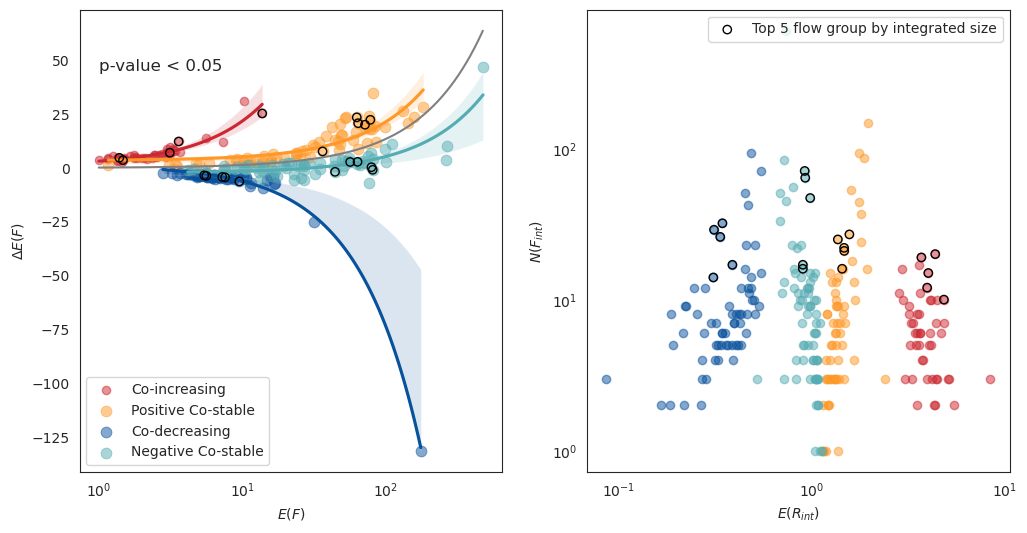

In [32]:
fig, (axes,axes1) = plt.subplots(1, 2, figsize=(12, 6))
# Plot
# fig, axes = plt.subplots(1, 1, figsize=(6, 6), sharey=True)

sns.set_style("white")
linear_co_in=sns.regplot(ax=axes,x='FG_avg_flow_weekend_weight', y='dif_day_end',data=sig_co_in,
                     scatter_kws={'color':'#CC2831','alpha':0.5},
                     line_kws={"color": "#CC2831"},label='Co-increasing')

linear_po_co=sns.regplot(ax=axes,x='FG_avg_flow_weekend_weight', y='dif_day_end',data=sig_po_co,
                     scatter_kws=dict(s=60, linewidths=.7, color='#FE9929',alpha=0.5),
                     line_kws={"color": "#FE9929"},label='Positive Co-stable')

linear_co_de=sns.regplot(ax=axes,x='FG_avg_flow_weekend_weight', y='dif_day_end',data=sig_co_de,
                     scatter_kws=dict(s=60, linewidths=.7, color='#08519C',alpha=0.5),
                     line_kws={"color": "#08519C"},label='Co-decreasing')
 
linear_ne_co=sns.regplot(ax=axes,x='FG_avg_flow_weekend_weight', y='dif_day_end',data=sig_ne_co,
                     scatter_kws=dict(s=60, linewidths=.7, color='#56ACB3',alpha=0.5), 
                         line_kws={"color": "#56ACB3"},label='Negative Co-stable')

average_flow_group=[i for i in range(1,int(max(sig_ne_co.FG_avg_flow_weekend_weight)))]
sns.lineplot(ax=axes,x=average_flow_group,y=[(G_weight_sum[0]/G_weight_sum[1]-1)*i for i in average_flow_group],color='grey')

axes.scatter(x=sig_co_in.loc[top_5_sig_co_in.index].FG_avg_flow_weekend_weight,
            y=sig_co_in.loc[top_5_sig_co_in.index].dif_day_end,
            color="none",edgecolors = 'black',zorder=10)
axes.scatter(x=sig_po_co.loc[top_5_sig_po_co.index].FG_avg_flow_weekend_weight,
            y=sig_po_co.loc[top_5_sig_po_co.index].dif_day_end,
            color="none",edgecolors = 'black',zorder=10)
axes.scatter(x=sig_co_de.loc[top_5_sig_co_de.index].FG_avg_flow_weekend_weight,
            y=sig_co_de.loc[top_5_sig_co_de.index].dif_day_end,
            color="none",edgecolors = 'black',zorder=10)
axes.scatter(x=sig_ne_co.loc[top_5_sig_ne_co.index].FG_avg_flow_weekend_weight,
            y=sig_ne_co.loc[top_5_sig_ne_co.index].dif_day_end,
            color="none",edgecolors = 'black',zorder=10)#,label='Top 5 flow group by integrated size'


axes.set_xscale('log')
axes.set_xlabel('$E(F)$')
axes.set_ylabel('$\Delta E(F)$')
axes.legend()


axes1.scatter(sig_co_in['Average intra-change rate'],sig_co_in['Reshuffled Internal-flow'],color='#CC2831',alpha=0.5)
axes1.scatter(sig_po_co['Average intra-change rate'],sig_po_co['Reshuffled Internal-flow'],color='#FE9929',alpha=0.5)
axes1.scatter(sig_co_de['Average intra-change rate'],sig_co_de['Reshuffled Internal-flow'],color='#08519C',alpha=0.5)
axes1.scatter(sig_ne_co['Average intra-change rate'],sig_ne_co['Reshuffled Internal-flow'],color='#56ACB3',alpha=0.5)

axes1.scatter(top_5_sig_co_in['Average intra-change rate'],
            top_5_sig_co_in['Reshuffled Internal-flow'],
            color="none",edgecolors = 'black')
axes1.scatter(top_5_sig_po_co['Average intra-change rate'],
            top_5_sig_po_co['Reshuffled Internal-flow'],
            color="none",edgecolors = 'black')
axes1.scatter(top_5_sig_co_de['Average intra-change rate'],
            top_5_sig_co_de['Reshuffled Internal-flow'],
            color="none",edgecolors = 'black')
axes1.scatter(top_5_sig_ne_co['Average intra-change rate'],
            top_5_sig_ne_co['Reshuffled Internal-flow'],
            color="none",edgecolors = 'black',label='Top 5 flow group by integrated size')

axes.text(x=1,y=45, s='p-value < 0.05',fontsize=12)
axes1.set_xscale('log')
axes1.set_yscale('log')
axes1.set_xlabel('$E(R_{int})$')
axes1.set_ylabel('$N(F_{int})$')
axes1.legend()

In [33]:
function_name=['Co-increasing','Positive co-stable','Co-decreasing','Negative Co-stable']
data=[sig_co_in,sig_po_co,sig_co_de,sig_ne_co]
fited_weekday_delta=Case_study_analysis.linear_fit_avg_weight_delta_without_log(data,function_name,[100,100,100,100],[1,1,1,1])

Co-increasing ：Y = 2.070679X + 1.049782 r_squared: 0.8648166344267808
Positive co-stable ：Y = 0.180499X + 3.370654 r_squared: 0.6987099584245728
Co-decreasing ：Y = -0.750427X + 1.348211 r_squared: 0.9877655476210745
Negative Co-stable ：Y = 0.076251X + -2.328261 r_squared: 0.6865090767875237


In [34]:
top_5_sig_co_in

,Flow groups,Reshuffled Internal-flow,Reshuffled External-flow,Average intra-change rate,Average inter-change rate,Difference of edge change rate,Pseudo p-value,FG_avg_flow_weekday_weight,FG_avg_flow_weekend_weight,Diameter,avg_distance,std_distance,dif_day_end
84,"$F^{p,+}_{85}$",10,491,4.828952,2.344472,2.484480,0.001,15.860000,3.600000,36.647720,16.004253,6.110989,12.260000
34,"$F^{p,+}_{35}$",20,638,4.351524,2.389268,1.962256,0.003,6.069565,1.391304,60.863114,20.101377,10.238213,4.678261
10,"$F^{p,+}_{11}$",15,689,4.007051,2.367048,1.640003,0.004,39.058824,13.764706,48.890735,20.803005,8.875645,25.294118
95,"$F^{p,+}_{96}$",12,509,3.952429,2.218721,1.733708,0.004,10.150000,3.125000,46.880135,20.244953,10.622534,7.025000
75,"$F^{p,+}_{76}$",19,569,3.690175,2.226933,1.463242,0.002,5.060000,1.475000,80.112081,25.324849,13.122478,3.585000


In [35]:
# Get the locations of flows
top_5_sig_co_in_flows=Case_study_analysis.get_flows_in_top5(P_weekday_g,P_weekend_g,fishnet,sig_co_in,top_5_sig_co_in,sig_co_in_node,co_in_CFEP)
top_5_sig_po_co_flows=Case_study_analysis.get_flows_in_top5(P_weekday_g,P_weekend_g,fishnet,sig_po_co,top_5_sig_po_co,sig_po_co_node,po_co_CFEP)
top_5_sig_co_de_flows=Case_study_analysis.get_flows_in_top5(N_weekday_g,N_weekend_g,fishnet,sig_co_de,top_5_sig_co_de,sig_co_de_node,co_de_CFEP)
top_5_sig_ne_co_flows=Case_study_analysis.get_flows_in_top5(N_weekday_g,N_weekend_g,fishnet,sig_ne_co,top_5_sig_ne_co,sig_ne_co_node,ne_co_CFEP)

In [36]:
top_5_sig_ne_co_flows.head()

,O,D,FG_index,change_rate,weekday_weight,weekend_weight,avg_change_rate_FG,O_x,O_y,D_x,D_y
0,635,837,0,0.960000,4.8,5.0,0.979342,-93.120891,44.970791,-93.197536,45.132717
1,635,672,0,0.903371,40.2,44.5,0.979342,-93.120891,44.970791,-93.006761,44.997860
2,635,670,0,1.067636,146.8,137.5,0.979342,-93.120891,44.970791,-93.082885,44.997830
3,635,701,0,0.937143,16.4,17.5,0.979342,-93.120891,44.970791,-93.197164,45.024696
4,635,705,0,0.677647,28.8,42.5,0.979342,-93.120891,44.970791,-93.044844,45.024857


### The  visualization of top 5 CFEP flow groups is achieved by [kepler.gl](https://kepler.gl/). You may download the dataframe of flow locations and upload it to kepler.gl for further editing.


<img src="4_CFEP.jpeg" width = "60%" />